In [74]:
# Libraries and utilities

# RENINDER: FARE FIT.TRANSFORM SOLO SU TRAINING E DOPO SUL TEST SOLO .TRANSFORM
# REMINDER: NORMALIZZARE PRIMA DI FARE TUTTO IL PREPROCESSING 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [75]:
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")


In [76]:
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)
#df_train.drop('Unnamed: 0',axis=1,inplace=True)


df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)
#df_test.drop('Unnamed: 0',axis=1,inplace=True)






In [77]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,9.150000e-07,-0.000031,0.0,0.0,...,-4.175609,740.409892,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,7.137790e-07,-0.000031,0.0,0.0,...,-1.100390,705.975006,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,9.554485e-07,0.000000,0.0,0.0,...,-3.120218,694.365924,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,9.176213e-07,-0.000031,0.0,0.0,...,-0.880988,663.205667,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,8.108948e-07,-0.000031,0.0,0.0,...,-1.071109,741.412796,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


FACCIAMO LA CLASSIFICAZIONE NORMALE 

In [78]:
df_train_c = df_train.copy()
df_test_c = df_test.copy()



LABEL ENCODING TRAIN FOR NORMAL CLASSIFICATION + NORMALIZATION

In [79]:
cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_train_c[i]=le.fit_transform(df_train_c[i])
categorical_col = ["emotion"]

df_train_c = pd.get_dummies(df_train_c, columns=categorical_col)    

df_train_c.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,9.150000e-07,-0.000031,0.0,0.0,15.028520,...,6.742190,-1.706215,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.137790e-07,-0.000031,0.0,0.0,16.488415,...,-0.700420,-0.201495,0,0,0,0,0,1,0,0
2,1,0,0,0,1,9.554485e-07,0.000000,0.0,0.0,17.035218,...,1.688986,-1.024773,0,0,0,0,0,1,0,0
3,1,0,0,1,1,9.176213e-07,-0.000031,0.0,0.0,21.824521,...,-0.594111,-0.412871,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.108948e-07,-0.000031,0.0,0.0,13.236022,...,0.126535,-0.620782,0,1,0,0,0,0,0,0


In [80]:
numeric_features = [n for n in df_train_c.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train_c[numeric_features])
df_train_c[numeric_features] = scaled_features
df_train_c.head()


col = [x for x in df_train_c.columns if x!='emotional_intensity']
X_train=df_train_c[col].values
y_train = np.array(df_train_c["emotional_intensity"])






LABEL ENCODING TEST FOR NORMAL CLASSIFICATION + NORMALIZATION

In [81]:
for i in cat_var:
    df_test_c[i]=le.fit_transform(df_test_c[i])
categorical_col = ["emotion"]

df_test_c = pd.get_dummies(df_test_c, columns=categorical_col)    

df_test_c.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,2.940224e-06,-0.000092,0.0,0.000153,11.392131,...,-0.260279,-0.566556,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.733752e-07,-0.000122,0.0,0.000153,13.621589,...,-0.428900,-0.587210,0,0,0,0,0,1,0,0
2,1,0,0,0,1,-3.741909e-06,-0.000061,0.0,0.000092,7.678162,...,0.626916,-0.883317,0,0,0,0,0,1,0,0
3,1,0,0,1,1,-5.069646e-07,-0.000092,0.0,0.000122,14.511231,...,-0.825144,-0.383701,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.640319e-07,-0.000061,0.0,0.000122,8.944732,...,-0.536669,-0.547354,0,1,0,0,0,0,0,0


In [82]:
numeric_features = [n for n in df_test_c.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]


scaled_features = scaler.transform(df_test_c[numeric_features])
df_test_c[numeric_features] = scaled_features
df_test_c.head()


col = [x for x in df_test_c.columns if x!='emotional_intensity']
X_test=df_test_c[col].values
y_test = np.array(df_test_c["emotional_intensity"])






GRID SEARCH PER LA CLASSIFICAZIONE NORMALE

In [83]:
param_grid = {'max_depth': [None, 2, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10, 15, 20]
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [84]:
print(grid.best_params_)

{'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 10}


In [85]:
param_grid = {
    "n_neighbors": np.arange(2,51),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock","minkowski"], # cityblock is the manhattan distance
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)

grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [86]:
print(grid.best_params_)

{'metric': 'cityblock', 'n_neighbors': 20, 'weights': 'distance'}


TESTIAMO I NOSTRI MODELLI :D

In [87]:
learner_KNN = KNeighborsClassifier(n_neighbors= 20, metric= 'cityblock', weights= 'distance')
classifier = learner_KNN.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       336
           1       0.80      0.45      0.58       288

    accuracy                           0.70       624
   macro avg       0.73      0.68      0.67       624
weighted avg       0.72      0.70      0.68       624



In [88]:
learner_DT= DecisionTreeClassifier(max_depth=5,min_samples_leaf=15,min_samples_split=5)
classifier = learner_DT.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       336
           1       0.66      0.66      0.66       288

    accuracy                           0.69       624
   macro avg       0.69      0.69      0.69       624
weighted avg       0.69      0.69      0.69       624



VERIFICHIAMO I VALORI DI EMOTIONAL INTENSITY NEL TRAINING

In [89]:
df_train['emotional_intensity'].value_counts()

normal    984
strong    844
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

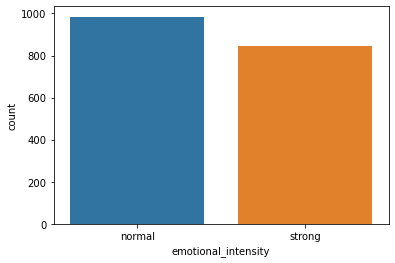

In [90]:
sns.countplot(data=df_train,x='emotional_intensity')

PROVO A SBILANCIARE

In [91]:
df_copy_train = df_train.copy()
#df_copy_train.drop('emotional_intensity',axis=1,inplace=True)

In [92]:
# Selezioniamo solo il 10% dei valori "strong"
#strong = df_train.loc[df_train['emotional_intensity'] == 'strong'].sample(frac=0.9)
#strong 
indexNames = df_train[ df_train['emotional_intensity'] == 'strong' ].sample(frac=0.93).index
df_copy_train.drop(indexNames,axis=0,inplace=True)






# Uniamo i dati selezionati con il restante 90% dei valori "normal"
#df_copy_train = pd.concat([df_train.loc[df_train['emotional_intensity'] == 'normal'], strong])



In [93]:
# Stampa della nuova proporzione di valori

print(df_copy_train['emotional_intensity'].value_counts(normalize=True))


normal    0.943432
strong    0.056568
Name: emotional_intensity, dtype: float64


In [94]:
df_copy_train['emotional_intensity'].value_counts()

normal    984
strong     59
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

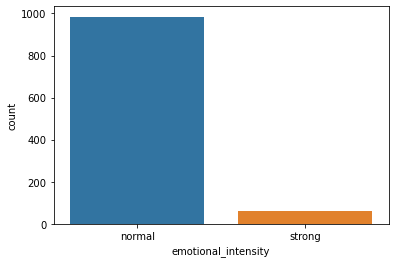

In [95]:
sns.countplot(data=df_copy_train,x='emotional_intensity')

In [96]:
df_copy_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,9.150000e-07,-0.000031,0.0,0.0,...,-4.175609,740.409892,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,7.137790e-07,-0.000031,0.0,0.0,...,-1.100390,705.975006,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,9.554485e-07,0.000000,0.0,0.0,...,-3.120218,694.365924,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,9.176213e-07,-0.000031,0.0,0.0,...,-0.880988,663.205667,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,8.108948e-07,-0.000031,0.0,0.0,...,-1.071109,741.412796,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


In [97]:
df_copy_train.shape

(1043, 259)

VERIFICHIAMO I VALORI DI EMOTIONAL INTENSITY NEL TEST E SBILANCIAMO


In [98]:
df_test['emotional_intensity'].value_counts()

normal    336
strong    288
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

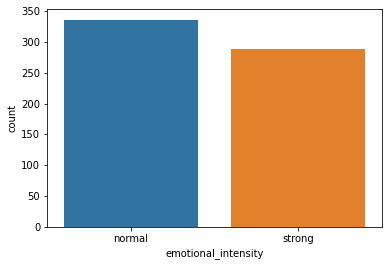

In [99]:
sns.countplot(data=df_test,x='emotional_intensity')

In [100]:
df_copy_test = df_test.copy()


In [101]:
# Selezioniamo solo il 10% dei valori "strong"
#strong = df_train.loc[df_train['emotional_intensity'] == 'strong'].sample(frac=0.9)
#strong 
indexNames = df_test[ df_test['emotional_intensity'] == 'strong' ].sample(frac=0.93).index
df_copy_test.drop(indexNames,axis=0,inplace=True)




In [102]:
# Stampa della nuova proporzione di valori

print(df_copy_test['emotional_intensity'].value_counts(normalize=True))


normal    0.94382
strong    0.05618
Name: emotional_intensity, dtype: float64


In [103]:
df_copy_test['emotional_intensity'].value_counts()

normal    336
strong     20
Name: emotional_intensity, dtype: int64

In [104]:
# Stampa della nuova proporzione di valori

print(df_copy_test['emotional_intensity'].value_counts(normalize=True))


normal    0.94382
strong    0.05618
Name: emotional_intensity, dtype: float64


In [105]:
df_copy_test['emotional_intensity'].value_counts()

normal    336
strong     20
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

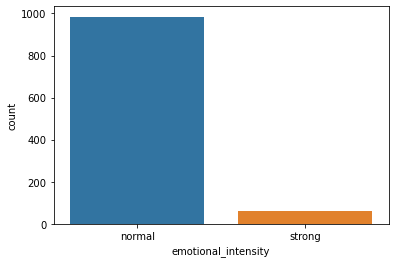

In [106]:
sns.countplot(data=df_copy_train,x='emotional_intensity')

LABEL ENCODING  TRAINING

In [107]:
c=df_copy_train.select_dtypes(include=['object']).columns.tolist()
c

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex']

In [108]:
cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy_train[i]=le.fit_transform(df_copy_train[i])
categorical_col = ["emotion"]

df_copy_train = pd.get_dummies(df_copy_train, columns=categorical_col)    

df_copy_train.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,9.150000e-07,-0.000031,0.0,0.0,15.028520,...,6.742190,-1.706215,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.137790e-07,-0.000031,0.0,0.0,16.488415,...,-0.700420,-0.201495,0,0,0,0,0,1,0,0
2,1,0,0,0,1,9.554485e-07,0.000000,0.0,0.0,17.035218,...,1.688986,-1.024773,0,0,0,0,0,1,0,0
3,1,0,0,1,1,9.176213e-07,-0.000031,0.0,0.0,21.824521,...,-0.594111,-0.412871,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.108948e-07,-0.000031,0.0,0.0,13.236022,...,0.126535,-0.620782,0,1,0,0,0,0,0,0


INTRODUCO LE LIBRERIE DI UNDER/OVER + DIM_RED

In [109]:

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from collections import Counter
from sklearn.decomposition import PCA




NORMALIZZAZIONE TRAINING

In [110]:
numeric_features = [n for n in df_copy_train.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_copy_train[numeric_features])
df_copy_train[numeric_features] = scaled_features
df_copy_train.head()


col = [x for x in df_copy_train.columns if x!='emotional_intensity']
X_train=df_copy_train[col].values
y_train = np.array(df_copy_train["emotional_intensity"])






NORMALIZZAZIONE + LABEL ENCODING + HOLDOUT TEST

In [111]:
for i in cat_var:
    df_copy_test[i]=le.fit_transform(df_copy_test[i])
categorical_col = ["emotion"]

df_copy_test = pd.get_dummies(df_copy_test, columns=categorical_col)    

df_copy_test.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,2.940224e-06,-0.000092,0.0,0.000153,11.392131,...,-0.260279,-0.566556,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.733752e-07,-0.000122,0.0,0.000153,13.621589,...,-0.428900,-0.587210,0,0,0,0,0,1,0,0
2,1,0,0,0,1,-3.741909e-06,-0.000061,0.0,0.000092,7.678162,...,0.626916,-0.883317,0,0,0,0,0,1,0,0
3,1,0,0,1,1,-5.069646e-07,-0.000092,0.0,0.000122,14.511231,...,-0.825144,-0.383701,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.640319e-07,-0.000061,0.0,0.000122,8.944732,...,-0.536669,-0.547354,0,1,0,0,0,0,0,0


In [112]:
scaled_features = scaler.transform(df_copy_test[numeric_features])
df_copy_test[numeric_features] = scaled_features
df_copy_test.head()


col = [x for x in df_copy_train.columns if x!='emotional_intensity']
X_test=df_copy_test[col].values
y_test = np.array(df_copy_test["emotional_intensity"])


ISTANZIO LA GRID SEARCH PER IL KNN E IL DT 

In [113]:
param_grid = {'max_depth': [None, 2, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10, 15, 20]
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [114]:
print(grid.best_params_)

{'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [115]:
param_grid = {
    "n_neighbors": np.arange(2,51),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock","minkowski"], # cityblock is the manhattan distance
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)

grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [116]:
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


RISULTATI NORMALI

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       336
           1       0.50      0.10      0.17        20

    accuracy                           0.94       356
   macro avg       0.72      0.55      0.57       356
weighted avg       0.92      0.94      0.93       356



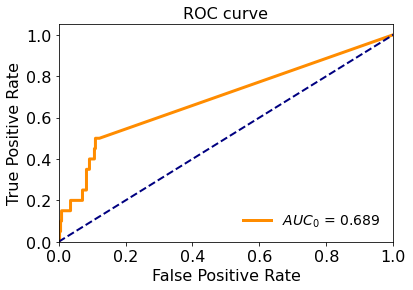

In [121]:
learner_KNN = KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
classifier = learner_KNN.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

y_score = classifier.predict_proba(X_test)
fpr0, tpr0, thr = roc_curve(y_test, y_score[:,1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
#learner_DT= DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=20)

In [118]:
learner_DT= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
classifier = learner_DT.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       336
           1       0.32      0.30      0.31        20

    accuracy                           0.92       356
   macro avg       0.64      0.63      0.63       356
weighted avg       0.92      0.92      0.92       356



In [119]:
from sklearn.decomposition import PCA
print(X_train.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
X_pca.shape

(1043, 265)


(1043, 2)

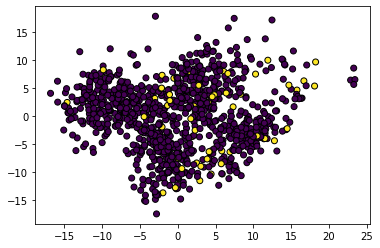

In [120]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train,edgecolors='k')
plt.show()

IMBALANCE

Random Undersampling

In [122]:
# Random Undersampler
rus = RandomUnderSampler(random_state=42)
X_res_u, y_res_u = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_u))

Resampled dataset shape Counter({0: 59, 1: 59})


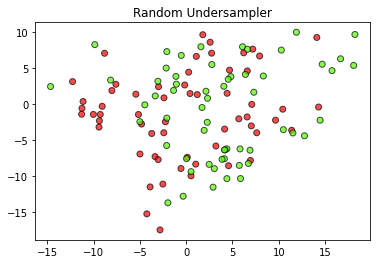

In [123]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res_u)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_u, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title('Random Undersampler')
plt.show()

In [124]:
classifier = learner_KNN.fit(X_res_u, y_res_u)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       336
           1       0.10      0.50      0.16        20

    accuracy                           0.71       356
   macro avg       0.53      0.61      0.50       356
weighted avg       0.91      0.71      0.79       356



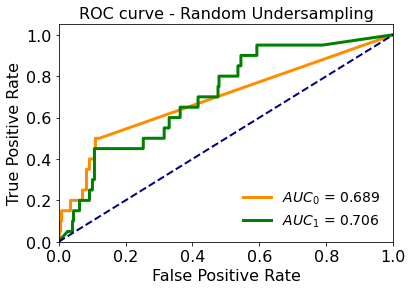

In [125]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - Random Undersampling', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [126]:
classifier = learner_DT.fit(X_res_u, y_res_u)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       336
           1       0.14      0.70      0.23        20

    accuracy                           0.74       356
   macro avg       0.56      0.72      0.54       356
weighted avg       0.93      0.74      0.81       356



Condensed nearest neighbour

In [127]:
import warnings
warnings.simplefilter("ignore")

cnn = CondensedNearestNeighbour(random_state=42, n_jobs = -1)
X_res_c, y_res_c = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_c))

Resampled dataset shape Counter({0: 134, 1: 59})


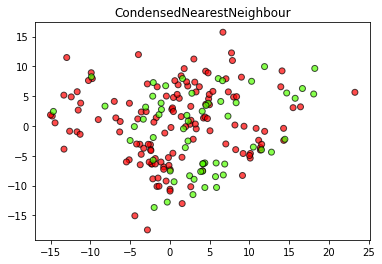

In [128]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res_c)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_c, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title('CondensedNearestNeighbour')
plt.show()

In [129]:
classifier = learner_KNN.fit(X_res_c, y_res_c)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       336
           1       0.28      0.25      0.26        20

    accuracy                           0.92       356
   macro avg       0.62      0.61      0.61       356
weighted avg       0.92      0.92      0.92       356



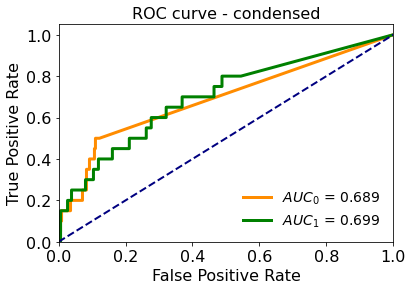

In [130]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - condensed', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [131]:
classifier = learner_DT.fit(X_res_c, y_res_c)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       336
           1       0.12      0.55      0.20        20

    accuracy                           0.76       356
   macro avg       0.54      0.66      0.53       356
weighted avg       0.92      0.76      0.82       356



Tomek Links

In [132]:
tl = TomekLinks()
X_res_t, y_res_t = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_t))

Resampled dataset shape Counter({0: 978, 1: 59})


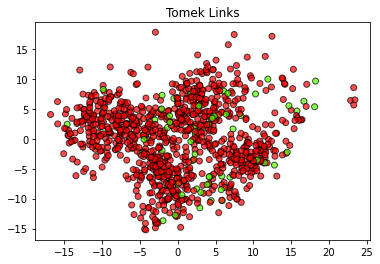

In [133]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res_t)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_t, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title('Tomek Links')
plt.show()

In [134]:
classifier = learner_KNN.fit(X_res_t, y_res_t)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       336
           1       0.50      0.10      0.17        20

    accuracy                           0.94       356
   macro avg       0.72      0.55      0.57       356
weighted avg       0.92      0.94      0.93       356



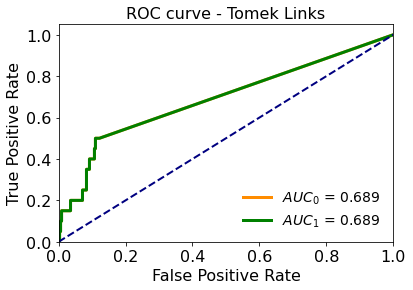

In [136]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - Tomek Links', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [137]:
classifier = learner_DT.fit(X_res_t, y_res_t)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       336
           1       0.32      0.30      0.31        20

    accuracy                           0.92       356
   macro avg       0.64      0.63      0.63       356
weighted avg       0.92      0.92      0.92       356



Edited Nearest Neighbour

In [138]:
enn = EditedNearestNeighbours()
X_res_e, y_res_e = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_e))

Resampled dataset shape Counter({0: 935, 1: 59})


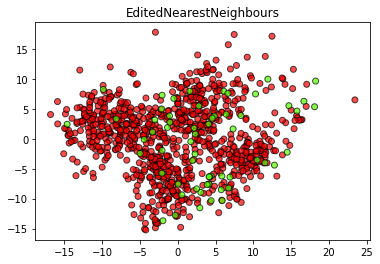

In [139]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res_e)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_e, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title('EditedNearestNeighbours')
plt.show()

In [140]:
classifier = learner_KNN.fit(X_res_e, y_res_e)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       336
           1       0.50      0.10      0.17        20

    accuracy                           0.94       356
   macro avg       0.72      0.55      0.57       356
weighted avg       0.92      0.94      0.93       356



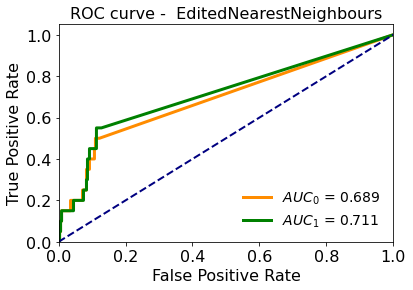

In [141]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve -  EditedNearestNeighbours', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [142]:
classifier = learner_DT.fit(X_res_e, y_res_e)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       336
           1       0.32      0.30      0.31        20

    accuracy                           0.92       356
   macro avg       0.64      0.63      0.63       356
weighted avg       0.92      0.92      0.92       356



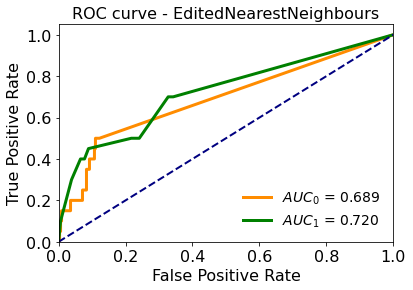

In [143]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - EditedNearestNeighbours', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













Cluster Centroids

In [144]:
from sklearn.cluster import KMeans
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(
    estimator=KMeans(n_init=1, random_state=0), random_state=42 # minibatch version is faster than Kmeans
)
X_res_cc, y_res_cc = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_cc))

Resampled dataset shape Counter({0: 59, 1: 59})


In [145]:
classifier = learner_KNN.fit(X_res_cc, y_res_cc)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       336
           1       0.36      0.40      0.38        20

    accuracy                           0.93       356
   macro avg       0.66      0.68      0.67       356
weighted avg       0.93      0.93      0.93       356



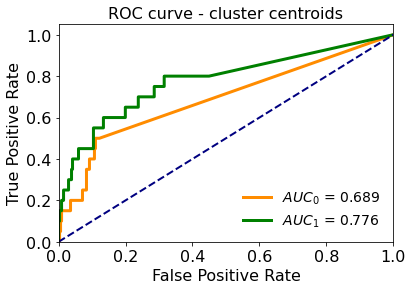

In [146]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - cluster centroids', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [147]:
classifier = learner_DT.fit(X_res_cc, y_res_cc)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.35      0.51       336
           1       0.06      0.75      0.12        20

    accuracy                           0.37       356
   macro avg       0.51      0.55      0.31       356
weighted avg       0.91      0.37      0.49       356



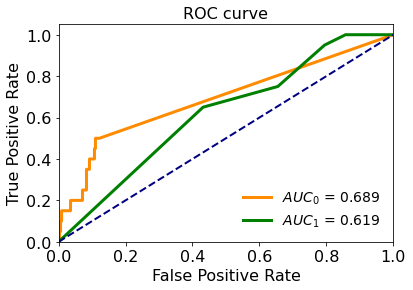

In [148]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













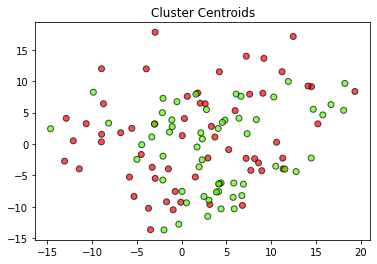

In [149]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res_cc)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_cc, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title('Cluster Centroids')
plt.show()

# Esperimento 2: Oversampling + Dim.Reduction + New classification with tuned hyperparameters

Random oversampler

In [150]:
ros = RandomOverSampler(random_state=42)
X_res_o, y_res_o = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_o))

Resampled dataset shape Counter({0: 984, 1: 984})


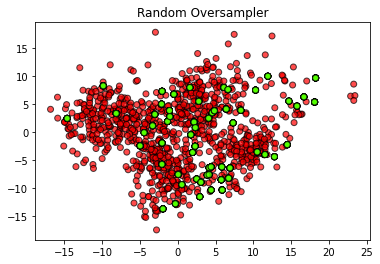

In [151]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res_o)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_o, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title('Random Oversampler')
plt.show()

In [152]:
classifier = learner_KNN.fit(X_res_o, y_res_o)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       336
           1       0.14      0.20      0.17        20

    accuracy                           0.89       356
   macro avg       0.55      0.56      0.55       356
weighted avg       0.91      0.89      0.90       356



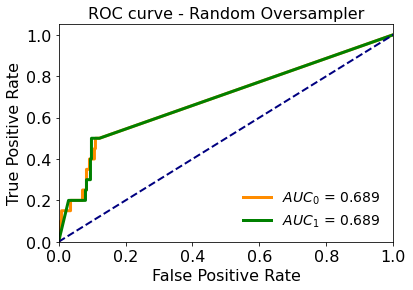

In [153]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - Random Oversampler', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [154]:
classifier = learner_DT.fit(X_res_o, y_res_o)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93       336
           1       0.22      0.55      0.31        20

    accuracy                           0.87       356
   macro avg       0.60      0.72      0.62       356
weighted avg       0.93      0.87      0.89       356



smote

In [156]:
sm = SMOTE(random_state=42)
X_res_s, y_res_s = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_s))

Resampled dataset shape Counter({0: 984, 1: 984})


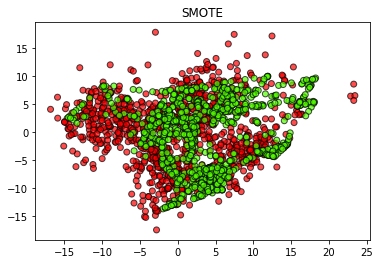

In [157]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res_s)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_s, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title('SMOTE')
plt.show()

In [158]:
classifier = learner_KNN.fit(X_res_s, y_res_s)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       336
           1       0.14      0.65      0.23        20

    accuracy                           0.75       356
   macro avg       0.56      0.70      0.54       356
weighted avg       0.93      0.75      0.82       356



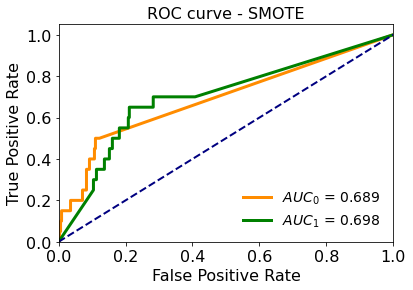

In [159]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - SMOTE', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [160]:
classifier = learner_DT.fit(X_res_s, y_res_s)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       336
           1       0.18      0.40      0.25        20

    accuracy                           0.87       356
   macro avg       0.57      0.65      0.59       356
weighted avg       0.92      0.87      0.89       356



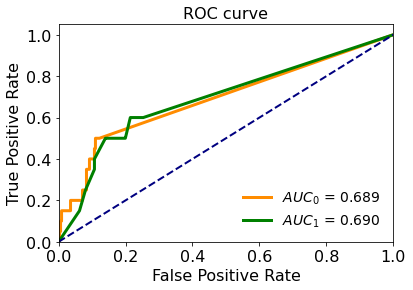

In [161]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













adasyn

In [162]:
ada = ADASYN(random_state=42)
X_res_a, y_res_a = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_a))

Resampled dataset shape Counter({1: 995, 0: 984})


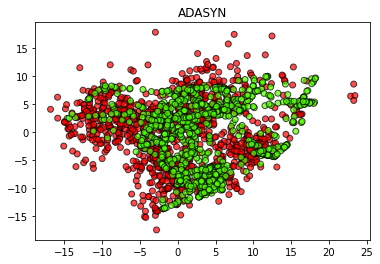

In [163]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res_a)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_a, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title('ADASYN')
plt.show()

In [164]:
classifier = learner_KNN.fit(X_res_a, y_res_a)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       336
           1       0.13      0.65      0.22        20

    accuracy                           0.74       356
   macro avg       0.55      0.70      0.53       356
weighted avg       0.93      0.74      0.81       356



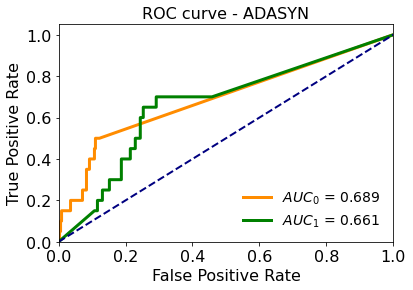

In [165]:


y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - ADASYN', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()













In [166]:
classifier = learner_DT.fit(X_res_a, y_res_a)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       336
           1       0.11      0.20      0.14        20

    accuracy                           0.87       356
   macro avg       0.53      0.55      0.53       356
weighted avg       0.90      0.87      0.88       356



Meta-cost -sensitive-classifier

In [ ]:
import sys
import joblib
import six
import sklearn.ensemble._base
sys.modules['sklearn.externals.joblib'] = joblib
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.six.moves'] = six.moves
sys.modules['sklearn.ensemble.base'] = sklearn.ensemble._base

!pip install costcla
from costcla.models import CostSensitiveDecisionTreeClassifier
from costcla.metrics import savings_score

In [ ]:
cost = [1, 10, 0, 0]  # if we want to apply this to all records we have to build a matrix of len(training)
cost_mat = np.array([cost] * len(X_train))
cost_mat.shape

(1043, 4)

In [ ]:
clf = CostSensitiveDecisionTreeClassifier()
clf.fit(X_train, y_train, cost_mat)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

KeyboardInterrupt: 

### DIM_ RED  + Random Under

Variance threshold

In [167]:
from sklearn.feature_selection import VarianceThreshold

In [191]:
#Let's test different Threshold for DT and KNN
thresholds = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.15, 0.16, 0.25, 1]
for i in thresholds:
    sel = VarianceThreshold(i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_res_cc)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_res_cc)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_res_cc)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

0.02
(118, 263)
DT - Accuracy 0.3707865168539326
DT - F1 Score 0.3120772946859903
KNN - Accuracy 0.9269662921348315
KNN - F1 Score 0.6710732054015637
0.04
(118, 263)
DT - Accuracy 0.3707865168539326
DT - F1 Score 0.3120772946859903
KNN - Accuracy 0.9269662921348315
KNN - F1 Score 0.6710732054015637
0.06
(118, 262)
DT - Accuracy 0.3707865168539326
DT - F1 Score 0.314513633394079
KNN - Accuracy 0.9269662921348315
KNN - F1 Score 0.6710732054015637
0.08
(118, 260)
DT - Accuracy 0.3707865168539326
DT - F1 Score 0.314513633394079
KNN - Accuracy 0.9269662921348315
KNN - F1 Score 0.6710732054015637
0.1
(118, 257)
DT - Accuracy 0.16853932584269662
DT - F1 Score 0.16535183601051864
KNN - Accuracy 0.9269662921348315
KNN - F1 Score 0.6710732054015637
0.12
(118, 256)
DT - Accuracy 0.16853932584269662
DT - F1 Score 0.16535183601051864
KNN - Accuracy 0.9269662921348315
KNN - F1 Score 0.6710732054015637
0.15
(118, 255)
DT - Accuracy 0.31741573033707865
DT - F1 Score 0.285713106158813
KNN - Accuracy 0.

In [174]:
sel = VarianceThreshold(0.2)
print(str(i))
X_train_sel = sel.fit_transform(X_res_c)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner= KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res_c)
y_pred = learner.predict(X_test_sel)

y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)












1
(193, 255)


SELECT K BEST 

In [176]:
from sklearn.feature_selection import SelectKBest

In [192]:
#Let's test different Threshold for DT and KNN
for i in range(20, 60):
    sel = SelectKBest(k=i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_res_cc, y_res_cc)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_res_cc)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_res_cc)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

20
(118, 20)
DT - Accuracy 0.3258426966292135
DT - F1 Score 0.2840623428858723
KNN - Accuracy 0.848314606741573
KNN - F1 Score 0.6278745644599303
21
(118, 21)
DT - Accuracy 0.3202247191011236
DT - F1 Score 0.28213845282138456
KNN - Accuracy 0.8370786516853933
KNN - F1 Score 0.6085835608128601
22
(118, 22)
DT - Accuracy 0.4157303370786517
DT - F1 Score 0.3379823337982334
KNN - Accuracy 0.851123595505618
KNN - F1 Score 0.6308426757449472
23
(118, 23)
DT - Accuracy 0.5589887640449438
DT - F1 Score 0.430690094219506
KNN - Accuracy 0.851123595505618
KNN - F1 Score 0.6308426757449472
24
(118, 24)
DT - Accuracy 0.5589887640449438
DT - F1 Score 0.430690094219506
KNN - Accuracy 0.8567415730337079
KNN - F1 Score 0.6447731408111756
25
(118, 25)
DT - Accuracy 0.5308988764044944
DT - F1 Score 0.4176339788611675
KNN - Accuracy 0.8370786516853933
KNN - F1 Score 0.6239801864801865
26
(118, 26)
DT - Accuracy 0.5308988764044944
DT - F1 Score 0.4176339788611675
KNN - Accuracy 0.8455056179775281
KNN - F1 

In [197]:
sel = SelectKBest(k=47)
print(str(i))
X_train_sel = sel.fit_transform(X_res_cc, y_res_cc)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner= KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res_cc)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_pred,y_test))

59
(118, 47)
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       316
           1       0.70      0.35      0.47        40

    accuracy                           0.91       356
   macro avg       0.81      0.67      0.71       356
weighted avg       0.90      0.91      0.90       356



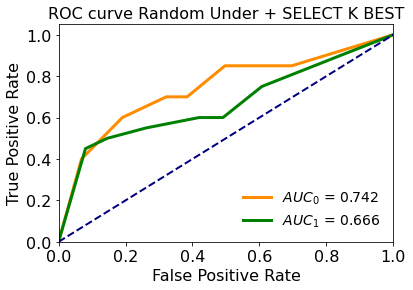

In [ ]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr1, tpr1, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc1))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve Random Under + SELECT K BEST', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Select from model 

In [180]:
from sklearn.feature_selection import SelectFromModel


In [196]:
sel = SelectFromModel(DecisionTreeClassifier(max_depth=15, min_samples_split=15, min_samples_leaf=10))
X_train_sel = sel.fit_transform(X_res_cc, y_res_c)
print(f"New dimension:{X_train_sel.shape}\n")

X_test_sel = sel.transform(X_test)
clf =KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_sel, y_res_c)
y_pred = clf.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# Ho fatto selezione sul modello del decision tree e testato il knn nella nuova dimensione

New dimension:(118, 3)

              precision    recall  f1-score   support

           0       0.95      0.31      0.47       336
           1       0.06      0.75      0.11        20

    accuracy                           0.34       356
   macro avg       0.51      0.53      0.29       356
weighted avg       0.90      0.34      0.45       356



In [184]:
clf = DecisionTreeClassifier(max_depth=15, min_samples_split=15, min_samples_leaf=10)
clf.fit(X_train_sel, y_res_c)
y_pred = clf.predict(X_test_sel)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       336
           1       0.13      0.65      0.22        20

    accuracy                           0.74       356
   macro avg       0.55      0.70      0.53       356
weighted avg       0.93      0.74      0.81       356



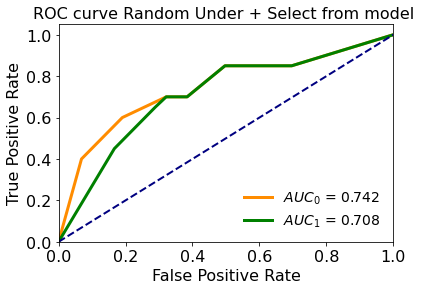

In [ ]:
y_score = clf.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr1, tpr1, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc1))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve Random Under + Select from model ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

RFE

In [188]:
from sklearn.feature_selection import RFE

In [190]:
#Let's test different k range for DT and KNN
for i in range(20, 60):
    print(str(i))

    sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=i)
    X_train_sel = sel.fit_transform(X_res_c, y_res_c)
    print(f" DT New dimension: {X_train_sel.shape}")
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_res_c)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_res_c)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

20
 DT New dimension: (193, 20)
DT - Accuracy 0.7415730337078652
DT - F1 Score 0.5327284140843462
KNN - Accuracy 0.8314606741573034
KNN - F1 Score 0.5364583333333334
21
 DT New dimension: (193, 21)
DT - Accuracy 0.7415730337078652
DT - F1 Score 0.5327284140843462
KNN - Accuracy 0.8595505617977528
KNN - F1 Score 0.5935330654000731
22
 DT New dimension: (193, 22)
DT - Accuracy 0.7415730337078652
DT - F1 Score 0.5327284140843462
KNN - Accuracy 0.8539325842696629
KNN - F1 Score 0.577274388016076
23
 DT New dimension: (193, 23)
DT - Accuracy 0.7415730337078652
DT - F1 Score 0.5327284140843462
KNN - Accuracy 0.848314606741573
KNN - F1 Score 0.561015710632079
24
 DT New dimension: (193, 24)
DT - Accuracy 0.7415730337078652
DT - F1 Score 0.5327284140843462
KNN - Accuracy 0.851123595505618
KNN - F1 Score 0.5513494233741529
25
 DT New dimension: (193, 25)
DT - Accuracy 0.7415730337078652
DT - F1 Score 0.5327284140843462
KNN - Accuracy 0.8342696629213483
KNN - F1 Score 0.5384852013798863
26
 DT N

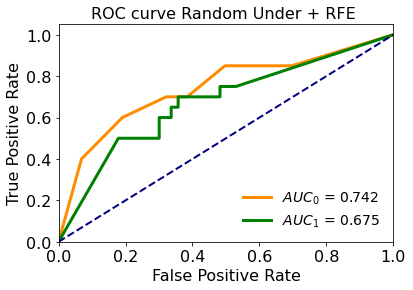

In [ ]:
learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res_u)
y_pred = learner.predict(X_test_sel)

y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr1, tpr1, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc1))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve Random Under + RFE ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### DIM_RED + SMOTE

Variance threshold

In [198]:
#Let's test different Threshold for DT and KNN
thresholds = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.15, 0.16, 0.25, 1]
for i in thresholds:
    sel = VarianceThreshold(i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_res_s)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_res_s)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_res_s)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

0.02
(1968, 264)
DT - Accuracy 0.8623595505617978
DT - F1 Score 0.5852098442515753
KNN - Accuracy 0.7528089887640449
KNN - F1 Score 0.5404564924015725
0.04
(1968, 264)
DT - Accuracy 0.8764044943820225
DT - F1 Score 0.5995910020449897
KNN - Accuracy 0.7528089887640449
KNN - F1 Score 0.5404564924015725
0.06
(1968, 264)
DT - Accuracy 0.8539325842696629
DT - F1 Score 0.5880729862038273
KNN - Accuracy 0.7528089887640449
KNN - F1 Score 0.5404564924015725
0.08
(1968, 262)
DT - Accuracy 0.8707865168539326
DT - F1 Score 0.5936476426799008
KNN - Accuracy 0.7556179775280899
KNN - F1 Score 0.5424232127291799
0.1
(1968, 259)
DT - Accuracy 0.8539325842696629
DT - F1 Score 0.5880729862038273
KNN - Accuracy 0.7556179775280899
KNN - F1 Score 0.5424232127291799
0.12
(1968, 256)
DT - Accuracy 0.851123595505618
DT - F1 Score 0.585418909714135
KNN - Accuracy 0.7584269662921348
KNN - F1 Score 0.544404761904762
0.15
(1968, 256)
DT - Accuracy 0.851123595505618
DT - F1 Score 0.595515252856561
KNN - Accuracy 0.

1
(1968, 81)


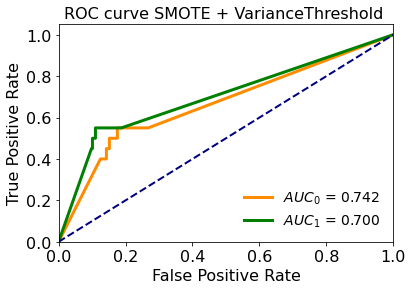

In [ ]:
sel = VarianceThreshold(1)
print(str(i))
X_train_sel = sel.fit_transform(X_res_s)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res_s)
y_pred = learner.predict(X_test_sel)

y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr2, tpr2, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc1))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve SMOTE + VarianceThreshold ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

SELECT K BEST

In [199]:
#Let's test different Threshold for DT and KNN
for i in range(20, 60):
    sel = SelectKBest(k=i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_res_s, y_res_s)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_res_s)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_res_s)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

20
(1968, 20)
DT - Accuracy 0.7528089887640449
DT - F1 Score 0.5122983996512859
KNN - Accuracy 0.7528089887640449
KNN - F1 Score 0.5338095238095238
21
(1968, 21)
DT - Accuracy 0.8258426966292135
DT - F1 Score 0.5324917393882911
KNN - Accuracy 0.797752808988764
KNN - F1 Score 0.5665584415584416
22
(1968, 22)
DT - Accuracy 0.8286516853932584
DT - F1 Score 0.5344609514009475
KNN - Accuracy 0.8061797752808989
KNN - F1 Score 0.5732972015217052
23
(1968, 23)
DT - Accuracy 0.8342696629213483
DT - F1 Score 0.5384852013798863
KNN - Accuracy 0.7837078651685393
KNN - F1 Score 0.548305238354178
24
(1968, 24)
DT - Accuracy 0.8398876404494382
DT - F1 Score 0.5426330380688349
KNN - Accuracy 0.7837078651685393
KNN - F1 Score 0.548305238354178
25
(1968, 25)
DT - Accuracy 0.8370786516853933
DT - F1 Score 0.5824638032839925
KNN - Accuracy 0.7724719101123596
KNN - F1 Score 0.5475641327371146
26
(1968, 26)
DT - Accuracy 0.8398876404494382
DT - F1 Score 0.5849882401063504
KNN - Accuracy 0.7668539325842697
K

In [ ]:
sel = SelectKBest(k=50)
print(str(i))
X_train_sel = sel.fit_transform(X_res_s, y_res_s)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res_s)
y_pred = learner.predict(X_test_sel)


59
(1968, 50)


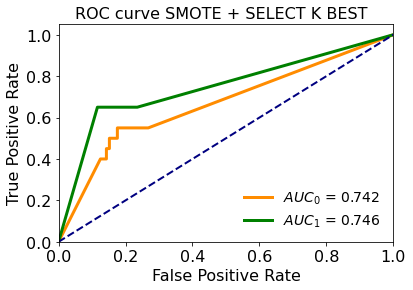

In [ ]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr2, tpr2, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc1))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve SMOTE + SELECT K BEST  ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

SELECT FROM MODEL

In [201]:
sel = SelectFromModel(DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=20))
X_train_sel = sel.fit_transform(X_res_s, y_res_s)
print(f"New dimension:{X_train_sel.shape}\n")

X_test_sel = sel.transform(X_test)
clf =KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_sel, y_res_s)
y_pred = clf.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# Ho fatto selezione sul modello del decision tree e testato il knn nella nuova dimensione

New dimension:(1968, 22)

              precision    recall  f1-score   support

           0       0.99      0.80      0.89       336
           1       0.20      0.80      0.31        20

    accuracy                           0.80       356
   macro avg       0.59      0.80      0.60       356
weighted avg       0.94      0.80      0.85       356



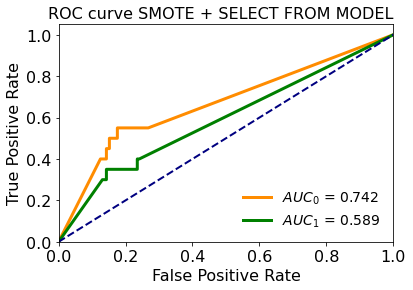

In [ ]:
y_score = clf.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr2, tpr2, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc1))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve SMOTE + SELECT FROM MODEL  ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_depth=15, min_samples_split=15, min_samples_leaf=10)
clf.fit(X_train_sel, y_res_s)
y_pred = clf.predict(X_test_sel)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.91      0.94       336
           1       0.19      0.35      0.25        20

    accuracy                           0.88       356
   macro avg       0.58      0.63      0.59       356
weighted avg       0.92      0.88      0.90       356



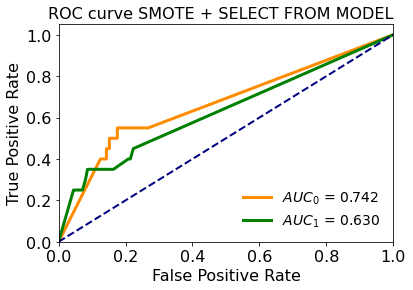

In [ ]:
y_score = clf.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr2, tpr2, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc1))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve SMOTE + SELECT FROM MODEL  ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

RFE

In [202]:
#Let's test different k range for DT and KNN
for i in range(20, 60):
    print(str(i))

    sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=i)
    X_train_sel = sel.fit_transform(X_res_s, y_res_s)
    print(f" DT New dimension: {X_train_sel.shape}")
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_res_s)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_res_s)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

20
 DT New dimension: (1968, 20)
DT - Accuracy 0.8792134831460674
DT - F1 Score 0.5617144329601741
KNN - Accuracy 0.8146067415730337
KNN - F1 Score 0.5802786709539121
21
 DT New dimension: (1968, 21)
DT - Accuracy 0.8792134831460674
DT - F1 Score 0.5617144329601741
KNN - Accuracy 0.8117977528089888
KNN - F1 Score 0.5779228822707084
22
 DT New dimension: (1968, 22)
DT - Accuracy 0.8707865168539326
DT - F1 Score 0.5542247386759581
KNN - Accuracy 0.797752808988764
KNN - F1 Score 0.5506311360448808
23
 DT New dimension: (1968, 23)
DT - Accuracy 0.8679775280898876
DT - F1 Score 0.5518414356501943
KNN - Accuracy 0.7949438202247191
KNN - F1 Score 0.5401249314292793
24
 DT New dimension: (1968, 24)
DT - Accuracy 0.8679775280898876
DT - F1 Score 0.5907745738254213
KNN - Accuracy 0.800561797752809
KNN - F1 Score 0.5527242483764223
25
 DT New dimension: (1968, 25)
DT - Accuracy 0.8539325842696629
DT - F1 Score 0.577274388016076
KNN - Accuracy 0.8117977528089888
KNN - F1 Score 0.5856653985790471
2

In [205]:
sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=30)
X_train_sel = sel.fit_transform(X_res_s, y_res_s)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)
learner= KNeighborsClassifier(n_neighbors= 4, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res_s)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))


 DT New dimension: (1968, 30)
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       336
           1       0.13      0.55      0.21        20

    accuracy                           0.77       356
   macro avg       0.55      0.66      0.54       356
weighted avg       0.92      0.77      0.83       356



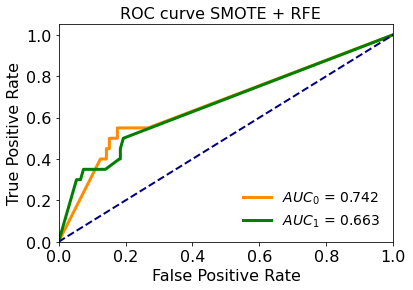

In [ ]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr2, tpr2, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc1))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve SMOTE + RFE  ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Dimensionality Reduction (Feature Selection)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#Let's test different Threshold for DT and KNN
thresholds = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.15, 0.16, 0.25, 1]
for i in thresholds:
    sel = VarianceThreshold(i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

0.02
(1043, 264)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9382022471910112
KNN - F1 Score 0.6172043010752688
0.04
(1043, 264)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9382022471910112
KNN - F1 Score 0.6172043010752688
0.06
(1043, 264)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9382022471910112
KNN - F1 Score 0.6172043010752688
0.08
(1043, 262)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9382022471910112
KNN - F1 Score 0.6172043010752688
0.1
(1043, 262)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9382022471910112
KNN - F1 Score 0.6172043010752688
0.12
(1043, 260)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9382022471910112
KNN - F1 Score 0.591060985797828
0.15
(1043, 256)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - 

In [ ]:
# Proviamo lo stesso esperimento però sui dati non normalizzati

df_train_pure=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test_pure=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

df_train_pure.drop('actor',axis=1,inplace=True)
df_train_pure.drop('filename',axis=1,inplace=True)

df_test_pure.drop('actor',axis=1,inplace=True)
df_test_pure.drop('filename',axis=1,inplace=True)

le=preprocessing.LabelEncoder()
c = ["statement","repetition","sex","emotional_intensity","vocal_channel"]
for i in c:
    df_train_pure[i]=le.fit_transform(df_train_pure[i])

for i in c:
    df_test_pure[i]=le.fit_transform(df_test_pure[i])
df_train_pure = pd.get_dummies(df_train_pure, columns=categorical_col)

df_test_pure = pd.get_dummies(df_test_pure, columns=categorical_col)   
col=[x for x in df_train_pure.columns if x!="emotional_intensity"]


   
X_train_pure=df_train_pure[col].values
y_train_pure = np.array(df_train_pure["emotional_intensity"])

X_test_pure=df_test_pure[col].values
y_test_pure = np.array(df_test_pure["emotional_intensity"])



#Let's test different Threshold for DT and KNN
thresholds = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.15, 0.16, 0.25,0.50,0.70]
for i in thresholds:
    sel = VarianceThreshold(i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train_pure)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test_pure)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train_pure)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test_pure, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test_pure, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train_pure)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test_pure, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test_pure, y_pred,average="macro"))




0.02
(1828, 191)
DT - Accuracy 0.6987179487179487
DT - F1 Score 0.6981939799331103
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.04
(1828, 187)
DT - Accuracy 0.6858974358974359
DT - F1 Score 0.6856907894736842
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.06
(1828, 182)
DT - Accuracy 0.6955128205128205
DT - F1 Score 0.6954001726476754
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.08
(1828, 178)
DT - Accuracy 0.7163461538461539
DT - F1 Score 0.7156443494715703
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.1
(1828, 177)
DT - Accuracy 0.7211538461538461
DT - F1 Score 0.7203235278965534
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.12
(1828, 174)
DT - Accuracy 0.7211538461538461
DT - F1 Score 0.7203235278965534
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.15
(1828, 165)
DT - Accuracy 0.6794871794871795
DT - F1 Score 0.6758609942340658
KNN - Accura

Univariate Feature Selection 

In [ ]:
from sklearn.feature_selection import SelectKBest


In [ ]:
#Let's test different Threshold for DT and KNN
for i in range(20, 60):
    sel = SelectKBest(k=i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train, y_train)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

20
(1043, 20)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9185393258426966
KNN - F1 Score 0.5642962650348174
21
(1043, 21)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9185393258426966
KNN - F1 Score 0.5866266266266266
22
(1043, 22)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9129213483146067
KNN - F1 Score 0.5795328989979808
23
(1043, 23)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9185393258426966
KNN - F1 Score 0.5866266266266266
24
(1043, 24)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9101123595505618
KNN - F1 Score 0.5552084960174918
25
(1043, 25)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.9297752808988764
KNN - F1 Score 0.6028026955862008
26
(1043, 26)
DT - Accuracy 0.9438202247191011
DT - F1 Score 0.48554913294797686
KNN - Accuracy 0.92977528

Selkect from model 

In [ ]:
from sklearn.feature_selection import SelectFromModel


In [ ]:
sel = SelectFromModel(DecisionTreeClassifier(max_depth=15, min_samples_split=15, min_samples_leaf=10))
X_train_sel = sel.fit_transform(X_train, y_train)
print(f"New dimension:{X_train_sel.shape}\n")

X_test_sel = sel.transform(X_test)
clf =KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# Ho fatto selezione sul modello del decision tree e testato il knn nella nuova dimensione

New dimension:(1043, 19)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       336
           1       0.33      0.20      0.25        20

    accuracy                           0.93       356
   macro avg       0.64      0.59      0.61       356
weighted avg       0.92      0.93      0.92       356



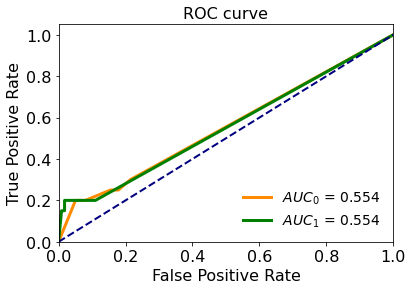

In [ ]:
y_score = clf.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
clf= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       336
           1       0.26      0.25      0.26        20

    accuracy                           0.92       356
   macro avg       0.61      0.60      0.61       356
weighted avg       0.92      0.92      0.92       356



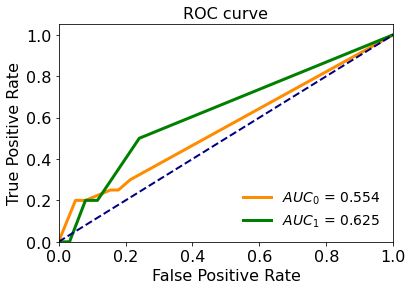

In [ ]:
y_score = clf.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Recursive Feature elimination

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
#Let's test different k range for DT and KNN
for i in range(20, 60):
    print(str(i))

    sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=i)
    X_train_sel = sel.fit_transform(X_train, y_train)
    print(f" DT New dimension: {X_train_sel.shape}")
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

20


KeyboardInterrupt: 

# DIMENSIONALITY REDUCTION ( FEATURE PROJECTION)

PCA

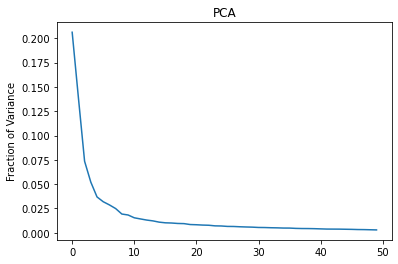

In [ ]:
plt.plot(PCA(n_components=50).fit(X_train,y_train).explained_variance_ratio_)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

In [ ]:
pca = PCA(n_components=30)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [ ]:
X_test_pca = pca.transform(X_test)
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       336
           1       1.00      0.10      0.18        20

    accuracy                           0.95       356
   macro avg       0.97      0.55      0.58       356
weighted avg       0.95      0.95      0.93       356



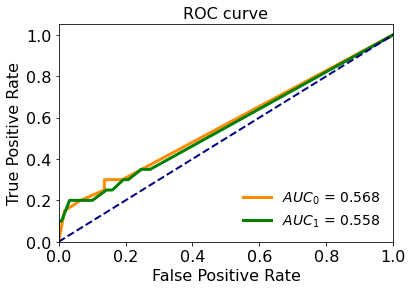

In [ ]:
y_score = clf.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [ ]:
X_test_pca = pca.transform(X_test)
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       336
           1       0.08      0.05      0.06        20

    accuracy                           0.92       356
   macro avg       0.51      0.51      0.51       356
weighted avg       0.90      0.92      0.91       356



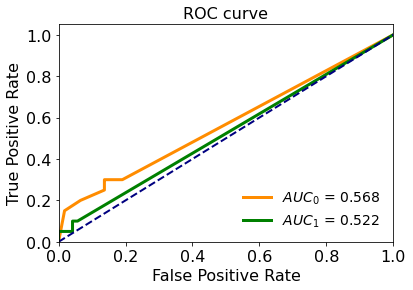

In [ ]:
y_score = clf.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



Random subspace projection 

In [ ]:
from sklearn import random_projection

rsp = random_projection.GaussianRandomProjection(n_components=30, random_state=0)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(1043, 30)

In [ ]:
X_test_rsp = rsp.transform(X_test)
clf =DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_rsp, y_train)
y_pred = clf.predict(X_test_rsp)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       336
           1       0.12      0.05      0.07        20

    accuracy                           0.93       356
   macro avg       0.54      0.51      0.52       356
weighted avg       0.90      0.93      0.91       356



In [ ]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_rsp, y_train)
y_pred = clf.predict(X_test_rsp)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       336
           1       0.12      0.05      0.07        20

    accuracy                           0.93       356
   macro avg       0.54      0.51      0.52       356
weighted avg       0.90      0.93      0.91       356



Multidimensional scaling

In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=20) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

(1043, 20)

In [ ]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       984
           1       0.64      0.31      0.41        59

    accuracy                           0.95      1043
   macro avg       0.80      0.65      0.69      1043
weighted avg       0.94      0.95      0.94      1043



In [ ]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00        59

    accuracy                           1.00      1043
   macro avg       1.00      1.00      1.00      1043
weighted avg       1.00      1.00      1.00      1043



ISOMAP

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=20)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

(1043, 20)

In [ ]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_iso)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       984
           1       0.07      0.12      0.09        59

    accuracy                           0.86      1043
   macro avg       0.51      0.51      0.51      1043
weighted avg       0.90      0.86      0.88      1043



In [ ]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_iso)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       984
           1       0.06      0.08      0.07        59

    accuracy                           0.87      1043
   macro avg       0.50      0.50      0.50      1043
weighted avg       0.89      0.87      0.88      1043



t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(1043, 3)

In [ ]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9482262703739214
F1-score [0.97318769 0.25      ]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       984
           1       0.69      0.15      0.25        59

    accuracy                           0.95      1043
   macro avg       0.82      0.57      0.61      1043
weighted avg       0.94      0.95      0.93      1043



In [ ]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00        59

    accuracy                           1.00      1043
   macro avg       1.00      1.00      1.00      1043
weighted avg       1.00      1.00      1.00      1043



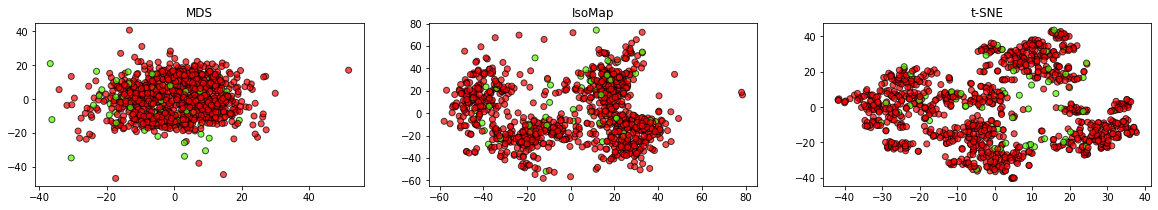

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,3))


mds = MDS(n_components=2) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape
axes[0].scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[0].set_title('MDS')

iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape
axes[1].scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[1].set_title('IsoMap')

tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape
axes[2].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
axes[2].set_title('t-SNE')

plt.show()

# Now we build two models with  the best sampling technics + best reduction technics based on the previous experiments

Voglio provare adasyn + Tomek

In [ ]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 996, 0: 984})


In [ ]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(k=33)
X_train_sel = sel.fit_transform(X_res, y_res)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner =  DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))


(1980, 33)
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       336
           1       0.10      0.30      0.15        20

    accuracy                           0.81       356
   macro avg       0.53      0.57      0.52       356
weighted avg       0.91      0.81      0.85       356



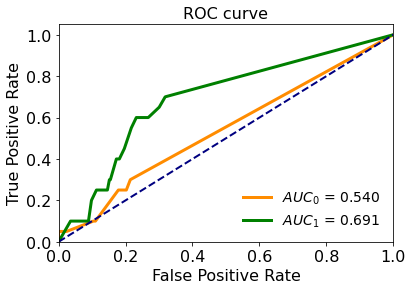

In [ ]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [ ]:
learner_KNN = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       336
           1       0.12      0.35      0.18        20

    accuracy                           0.82       356
   macro avg       0.54      0.60      0.54       356
weighted avg       0.91      0.82      0.86       356



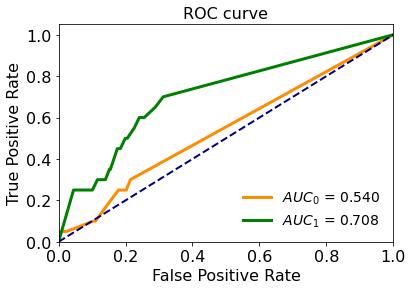

In [ ]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [ ]:
sel = VarianceThreshold(0.12)
#print(str(i))
X_train_sel = sel.fit_transform(X_res)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
learner.fit(X_train_sel, y_res)

(1980, 256)


DecisionTreeClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=15)

In [ ]:
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.88      0.91       336
           1       0.09      0.20      0.13        20

    accuracy                           0.84       356
   macro avg       0.52      0.54      0.52       356
weighted avg       0.90      0.84      0.87       356



In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 973, 1: 59})


In [ ]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(k=33)
X_train_sel = sel.fit_transform(X_res, y_res)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner =  DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))




(1032, 33)
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       336
           1       0.24      0.20      0.22        20

    accuracy                           0.92       356
   macro avg       0.59      0.58      0.59       356
weighted avg       0.91      0.92      0.92       356



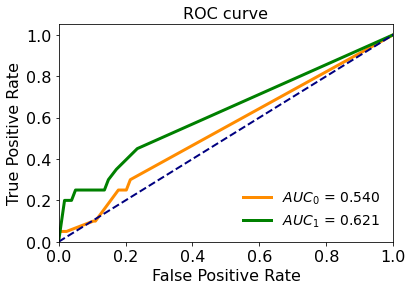

In [ ]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [ ]:
learner = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       336
           1       0.21      0.20      0.21        20

    accuracy                           0.91       356
   macro avg       0.58      0.58      0.58       356
weighted avg       0.91      0.91      0.91       356



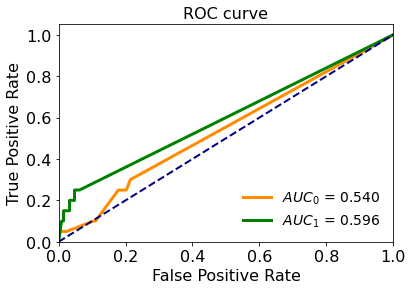

In [ ]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [ ]:
from sklearn.feature_selection import RFE

sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=20)
X_train_sel = sel.fit_transform(X_res, y_res)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

learner = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test,y_pred))

 DT New dimension: (1032, 20)
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       336
           1       0.00      0.00      0.00        20

    accuracy                           0.90       356
   macro avg       0.47      0.47      0.47       356
weighted avg       0.89      0.90      0.89       356



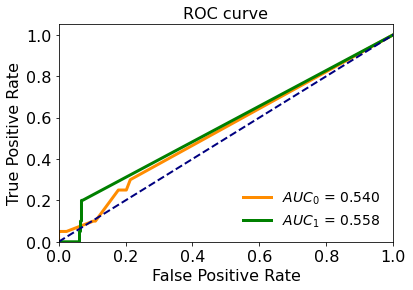

In [ ]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [ ]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 996, 0: 984})


In [ ]:
sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=20)
X_train_sel = sel.fit_transform(X_res, y_res)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

learner = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test,y_pred))

 DT New dimension: (1980, 20)
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       336
           1       0.10      0.20      0.13        20

    accuracy                           0.85       356
   macro avg       0.52      0.54      0.52       356
weighted avg       0.90      0.85      0.87       356



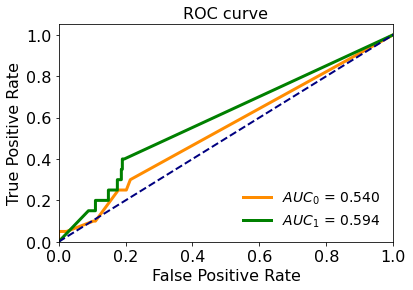

In [ ]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()



In [ ]:
learner = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       336
           1       0.12      0.25      0.16        20

    accuracy                           0.85       356
   macro avg       0.54      0.57      0.54       356
weighted avg       0.91      0.85      0.88       356



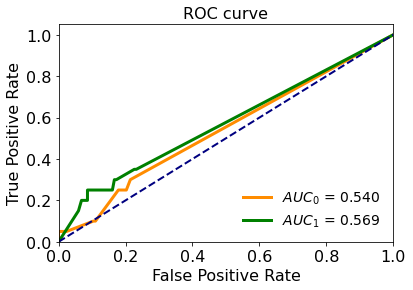

In [ ]:
y_score = learner.predict_proba(X_test_sel)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

